In [1]:
using JLD
push!(LOAD_PATH,joinpath("..","src"))
using Multilane

INFO: Recompiling stale cache file /home/chris/.julia/lib/v0.4/Conda.ji for module Conda.
INFO: Recompiling stale cache file /home/chris/.julia/lib/v0.4/PyCall.ji for module PyCall.
INFO: Recompiling stale cache file /home/chris/.julia/lib/v0.4/PyPlot.ji for module PyPlot.


In [2]:
d = load("results.jld")

Dict{ByteString,Any} with 22 entries:
  "dpw9"             => Multilane.NoCrashStats([Multilane.NoCrashStat(1,2.02,-1…
  "single_dpw7"      => Multilane.NoCrashStats([Multilane.NoCrashStat(96,1.1,85…
  "dpw4"             => Multilane.NoCrashStats([Multilane.NoCrashStat(97,21.0,7…
  "single_dpw3"      => Multilane.NoCrashStats([Multilane.NoCrashStat(92,21.0,8…
  "single_dpw2"      => Multilane.NoCrashStats([Multilane.NoCrashStat(97,19.333…
  "single_dpw8"      => Multilane.NoCrashStats([Multilane.NoCrashStat(57,7.0,-1…
  "dpw7"             => Multilane.NoCrashStats([Multilane.NoCrashStat(77,7.1,60…
  "dpw1"             => Multilane.NoCrashStats([Multilane.NoCrashStat(98,12.0,9…
  "single_dpw10"     => Multilane.NoCrashStats([Multilane.NoCrashStat(93,11.01,…
  "simple_heuristic" => Multilane.NoCrashStats([Multilane.NoCrashStat(95,25.0,9…
  "single_dpw5"      => Multilane.NoCrashStats([Multilane.NoCrashStat(97,3.3333…
  "single_dpw6"      => Multilane.NoCrashStats([Multilane.NoCrashStat(9

In [3]:
import Base: mean, std
function mean(ncs::NoCrashStats)
  t = Real[stat.t_in_goal for stat in ncs.stats]
  b = Real[stat.nb_induced_brakes for stat in ncs.stats]
  r = Real[stat.reward for stat in ncs.stats]
  return mean(t), mean(b), mean(r)
end

function std(ncs::NoCrashStats)
  t = Real[stat.t_in_goal for stat in ncs.stats]
  b = Real[stat.nb_induced_brakes for stat in ncs.stats]
  r = Real[stat.reward for stat in ncs.stats]
  return std(t), std(b), std(r)
end

function ste(ncs::NoCrashStats)
  t,b,r = std(ncs)
  return t/sqrt(length(ncs)), b/sqrt(length(ncs)), r/sqrt(length(ncs))
end

ste (generic function with 1 method)

In [4]:
dpw = [string("dpw",k) for k in 1:10]
single_dpw = [string("single_dpw",k) for k in 1:10]

10-element Array{ByteString,1}:
 "single_dpw1" 
 "single_dpw2" 
 "single_dpw3" 
 "single_dpw4" 
 "single_dpw5" 
 "single_dpw6" 
 "single_dpw7" 
 "single_dpw8" 
 "single_dpw9" 
 "single_dpw10"

In [5]:
using PyPlot

In [6]:
random = mean(d["random"])

(16.61,15.05,151.05)

In [7]:
heur = mean(d["simple_heuristic"])
dpw = [mean(d[s]) for s in dpw]
single_dpw = [mean(d[s]) for s in single_dpw]

10-element Array{Any,1}:
 (85.19,26.12,825.78)              
 (84.31,20.373333333333306,781.98) 
 (85.72,17.46,769.9)               
 (83.4,16.01,673.9)                
 (80.66,13.249999999999993,409.1)  
 (74.3,13.178000000000019,84.1)    
 (65.83,11.680000000000001,-509.7) 
 (62.1,11.21966666666666,-2744.9)  
 (58.65,10.520999999999992,-4674.0)
 (56.62,10.354899999999995,-9788.7)

In [8]:
dpw_x = [x[1] for x in dpw]
dpy_y = [x[2] for x in dpw]
single_dpw_x = [x[1] for x in single_dpw]
single_dpw_y = [x[2] for x in single_dpw]
pomcp_dpw_x = [0,7,16.5,7.6,9.1,8.1,1.2,0.1,0.3,0.6]
pomcp_dpw_y = [0.3,6.933, 8.8,11, 8.133, 7.62, 5.21, 6.2033, 4.204, 6.501]
pomcp_dpw_x_2 = [0, 11.3, 9.6, 7.1, 1.1, 0.8, 7.3, 3.1, 0.8, 0.1]
pomcp_dpw_y_2 = [0.3, 12.6667, 9, 11.9, 9.7333, 2.54, 9.80999,5.0066, 10.5, 5.801]

10-element Array{Float64,1}:
  0.3    
 12.6667 
  9.0    
 11.9    
  9.7333 
  2.54   
  9.80999
  5.0066 
 10.5    
  5.801  

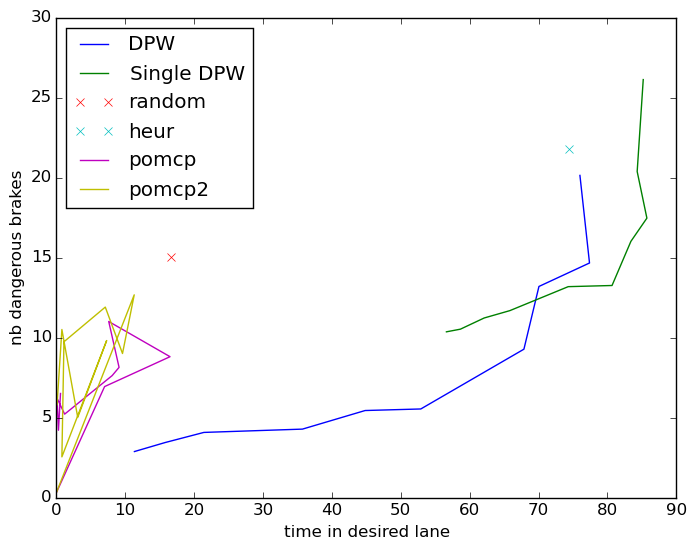

PyObject <matplotlib.text.Text object at 0x7f404002acd0>

In [9]:
plot(dpw_x,dpy_y)
plot(single_dpw_x,single_dpw_y)
plot(random[1],random[2],"x")
plot(heur[1],heur[2],"x")
plot(pomcp_dpw_x,pomcp_dpw_y)
plot(pomcp_dpw_x_2,pomcp_dpw_y_2)
#legend(["DPW","Single DPW", "random", "heur"],"upper left")
legend(["DPW","Single DPW", "random", "heur","pomcp","pomcp2"],loc="upper left")
xlabel("time in desired lane")
ylabel("nb dangerous brakes")

In [11]:
length(pomcp_dpw_y)

10